# Aula 03 - Python

Nessa Aula veremos:
1. Numpy arrays e pandas dataframes
2. Open and export files
3. Condicional Statements
4. Loops em Python
5. Functions - def

#### 1.1 Numpy arrays

In [9]:
import numpy as np

#Criando um vetor de dados aleatórios
data =np.random.rand(1000,2)

#Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

#Print de uma amostra de dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.61024239 0.82939214]
 [0.93170809 0.75901013]
 [0.21471821 0.06896744]
 [0.18289206 0.47112235]
 [0.44531878 0.974775  ]
 [0.74269622 0.07635715]
 [0.68147154 0.52793669]
 [0.23897196 0.25830715]
 [0.380331   0.76039633]
 [0.81284087 0.22067357]]
(10, 2)


In [10]:
#Usando Monte-Carlo
datamax=1000
datamin=10
data=(datamax-datamin)*data+datamin
print(data[0:10])

[[614.13996524 831.09821988]
 [932.39100525 761.42002836]
 [222.57102535  78.27776628]
 [191.06314354 476.41112651]
 [450.86559689 975.02725194]
 [745.26925921  85.5935743 ]
 [684.65682285 532.65732787]
 [246.58224133 265.72407728]
 [386.52768779 762.79236715]
 [814.7124574  228.46683726]]


<class 'numpy.ndarray'>


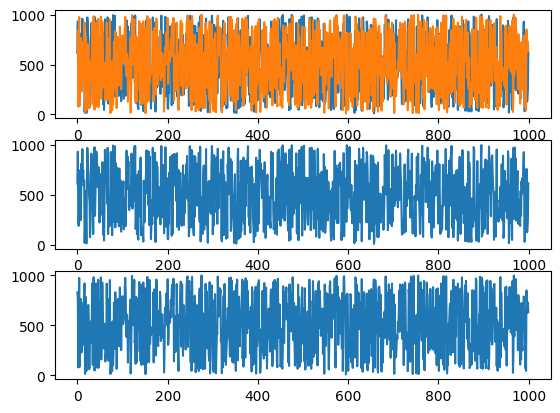

In [11]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [12]:
#Criando um dado 2D
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.7097491  0.30461095 0.10902692 ... 0.01790148 0.04876033 0.53944995]
 [0.28685384 0.63460168 0.10492144 ... 0.39072293 0.81802587 0.07635396]
 [0.80140376 0.78768268 0.49325147 ... 0.76406834 0.77036468 0.66687981]
 ...
 [0.57254169 0.55505843 0.1861253  ... 0.16705923 0.77457033 0.57326037]
 [0.49838383 0.44527457 0.61070035 ... 0.82446742 0.78024165 0.41924173]
 [0.08428228 0.30286998 0.5539426  ... 0.19166252 0.34111802 0.78087204]]


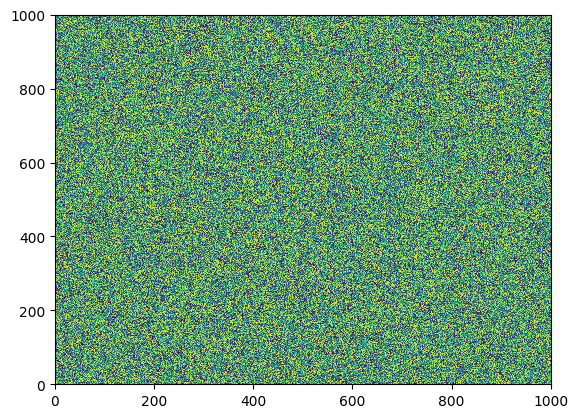

In [13]:
#Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [56]:
#Criando vetor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


#### Pandas

In [57]:
import pandas as pd


#Criando um dataframe
df = pd.DataFrame()

In [58]:
#Mostrando um dataframe
df['datetime'] = dtime

In [59]:
#Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [60]:
df['random'][1:10]

1    0.215629
2    0.543740
3    0.391703
4    0.493865
5    0.824820
6    0.703566
7    0.076425
8    0.195956
9    0.381023
Name: random, dtype: float64

In [63]:
#Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [64]:
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.128535
2022-01-01 01:00:00,2022-01-01 01:00:00,0.215629
2022-01-01 02:00:00,2022-01-01 02:00:00,0.543740
2022-01-01 03:00:00,2022-01-01 03:00:00,0.391703
2022-01-01 04:00:00,2022-01-01 04:00:00,0.493865
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.003069
2022-12-31 20:00:00,2022-12-31 20:00:00,0.690984
2022-12-31 21:00:00,2022-12-31 21:00:00,0.504240


In [65]:
#Criando colunas com ano mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

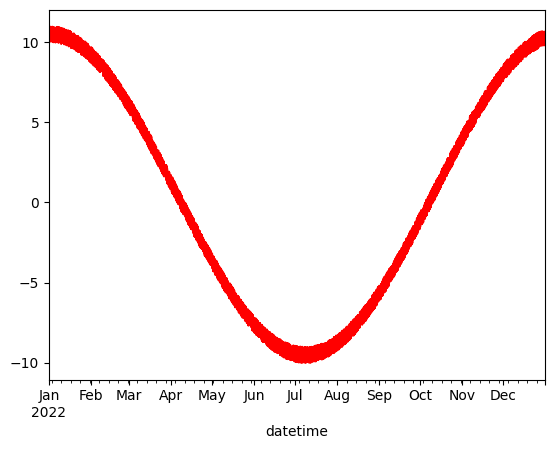

In [66]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [67]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.128535,2022,1,1,1.000000,10.128535
2022-01-01 01:00:00,2022-01-01 01:00:00,0.215629,2022,1,1,1.000000,10.215626
2022-01-01 02:00:00,2022-01-01 02:00:00,0.543740,2022,1,1,0.999999,10.543730
2022-01-01 03:00:00,2022-01-01 03:00:00,0.391703,2022,1,1,0.999998,10.391681
2022-01-01 04:00:00,2022-01-01 04:00:00,0.493865,2022,1,1,0.999996,10.493827
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.003069,2022,12,31,0.979401,9.797077
2022-12-31 20:00:00,2022-12-31 20:00:00,0.690984,2022,12,31,0.979541,10.486391
2022-12-31 21:00:00,2022-12-31 21:00:00,0.504240,2022,12,31,0.979680,10.301043


In [68]:
#salvar dataframe
df.to_csv(r'C:\Users\HP\Documents\Gabriel.py\ENS5173\dados brutos\noise_2022.csv')

In [69]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Gabriel
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


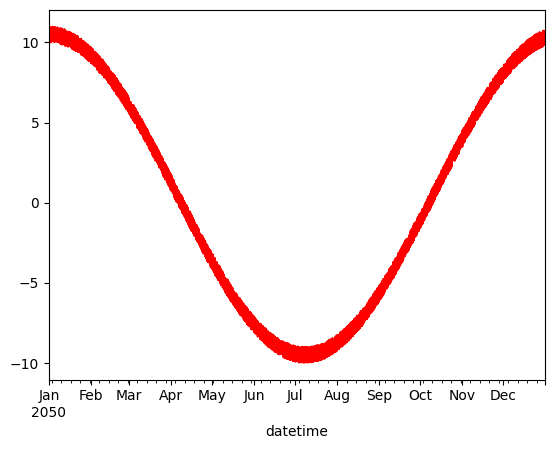

In [73]:
path = 'C:/Users/HP/Documents/Gabriel.py/ENS5173/dados brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


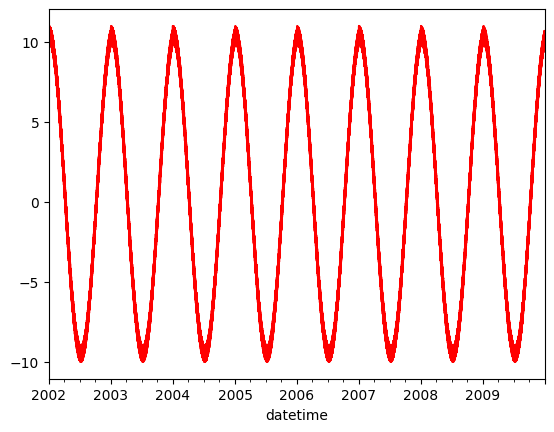

In [74]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [75]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.228621,1.000000,10.228621
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.345649,1.000000,10.345647
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.486894,0.999999,10.486884
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.686789,0.999998,10.686767
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.905825,0.999996,10.905786
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.275048,0.979401,10.069056
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.420851,0.979541,10.216258
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.846651,0.979680,10.643454


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


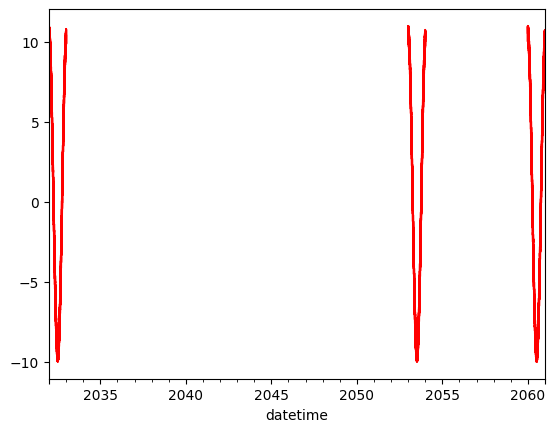

In [76]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [77]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2022.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2022.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [78]:
allDataDf = pd.concat(allData)

In [79]:
allDataDf

,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.785205,1.000000,10.785205
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.087800,1.000000,10.087797
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.725533,0.999999,10.725523
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.094614,0.999998,10.094592
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.203792,0.999996,10.203754
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.176567,0.982630,10.002867
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.284655,0.982759,10.112242
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.872976,0.982887,10.701844
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.014460,0.983014,9.844605


In [ ]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])